DSCI 235 SP 2024 Project Final Report
---
Elle Angell

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# computer couldn't locate/find the .tab file
# using to help upload file
from google.colab import files
upload_results_file = files.upload()

Saving Results_Sexual_Harassment.tab to Results_Sexual_Harassment.tab


###Introduction
####Over-sexualized content has been present online for decades, including in video games. This realization often has people questioning whether this content is safe or not. The dataset I chose is centered around an experimental study that focuses on the relationship between sexualized video game content and their behavior around harassment.
####The study had participants playing video games with female AI characters who were either being sexualized or non-sexualized. After gameplay, participants were given the option to see and harass their partner (male or female) with sexist jokes. Overall, it measures the relationship sexualized content and harassment behavior/tendencies.
####Each row in the dataset represents one participant, including their background and responses. Key variables we'll be focusing on are whether the participant was sexualized or not, their partner's gender, the level of sexist jokes made against their partner, and their level of frustration while playing the game.
####For this analysis, I have filtered out participants that answered no to playing video games, because we want to focus on participants that regularly play games. With this focus, we can further analyze the possible relationships between one's behavior towards the game, their harassment behavior/tendencies, and the content they were given in-game.
####The source of data for this analysis is a .tab file from Harvard's Dataverse website: https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/9TFDEV/35TVEV&version=1.0

In [4]:
# creating the df of the results dataset
results_df = pd.read_csv("Results_Sexual_Harassment.tab", sep="\t")
# filtered df - filters out people that said No to playing games
# Reasoning: We only want to be looking at people who play video games
filtered_df = results_df[results_df["Player"] == "Y"]
print(filtered_df.head())

    Code Sexualization partnergender Participantgender  Age Player  Hourweek  \
1      2             S             F                 M   24      Y       4.0   
6      7            NS             F                 M   21      Y       6.0   
8      9            NS             M                 F   22      Y       2.0   
10    11             S             M                 M   20      Y       5.0   
12    13            NS             M                 F   24      Y       2.0   

   USFIVPlayer  Sesistjokes  VGDifficulty  ...  VGFrustration  VGExcitement  \
1            N            1             6  ...              8             4   
6            N            2             9  ...              6             1   
8            N            3             9  ...              9             6   
10           N            2             7  ...              4             6   
12           N            5             9  ...              8             1   

    VGcompetitive  VGreaslit  VGviolent  HS 

####Column Descriptions
#####Code: Participant ID
#####Sexualization: Whether the character for sexualized (S for sexualized and NS for not sexualized)
#####partnergender: Gender of the participant's partner (F for female, M for male)
#####Age: Age of the participant
#####Player: Whether the participant plays video games (Y for yes)
#####Hourweek: Hours of video games played per week
#####USFIVPlayer: Unknown variable
#####Sesistjokes: Level of sexist jokes made (1 = low, 5 = high)
#####VGDifficulty: Difficulty of game (1 = not difficult, 10 = very difficult)
#####VGFrustration: Frustration level while playing (1 = not frustrated, 10 = very frustrated)
#####VGExcitement: Excitement level while playing (1 = not excited, 10 = very excited)
#####VGcompetitive: Competitive level while playing (1 = not competitive, 10 = very competitive)
#####VGreaslit: Realism level of video game (1 = not real, 10 = very real)
#####VGviolent: Violence level of video game (1 = not violent, 10 = very violent)
#####HS: Video game high score
#####BS: Video game worst score
#####GA: Unknown variable (possibly Game Awareness)
#####ODS: Unknown variable
#####Suspicious: Whether the participant felt suspicious of the experiment


In this analysis, I want to address these questions:
#####1. Does exposure to sexualized content affect a participant's likelihood to engage in harassment?
#####2. Is there a relationship between the participant's gender and the level of sexist jokes made?
#####3. Is there a difference between men and women's responses during gameplay?


###Data Analysis

To start off, lets analyze and compare the level of sexist jokes made by gender.

Text(0, 0.5, 'Average Sexist Joke Level (1-5)')

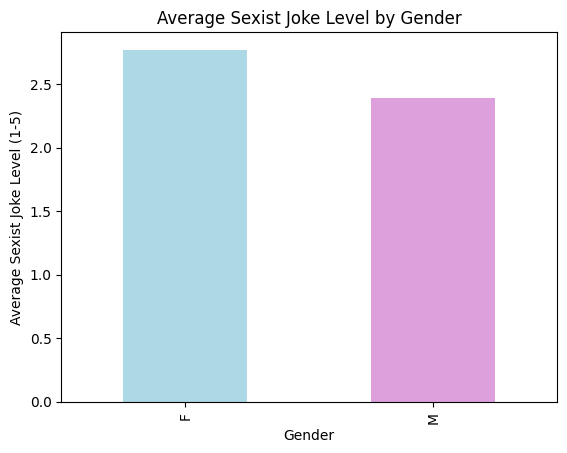

In [6]:
# grouping by participant gender and calculating the average sexist joke level
average_joke = filtered_df.groupby('Participantgender')['Sesistjokes'].mean()
average_joke
# bar plot comparing male and female's level of sexist jokes made
average_joke.plot(kind='bar', color=['lightblue', 'plum'])
#filtered_df.boxplot(column='Sesistjokes', by='Participantgender')
plt.title("Average Sexist Joke Level by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Sexist Joke Level (1-5)")

The results from this bar plot are surprising. On average, women were more likely to make a sexist joke than men. However, both gender are very similar in value, suggesting there isn't a significant difference between the level of jokes made.

Next, it's critical for this analysis to see if a participant getting a sexualized or non-sexualized character in the game affects the level of sexist jokes made.

Text(0, 0.5, 'Average Sexist Joke Level (1-5)')

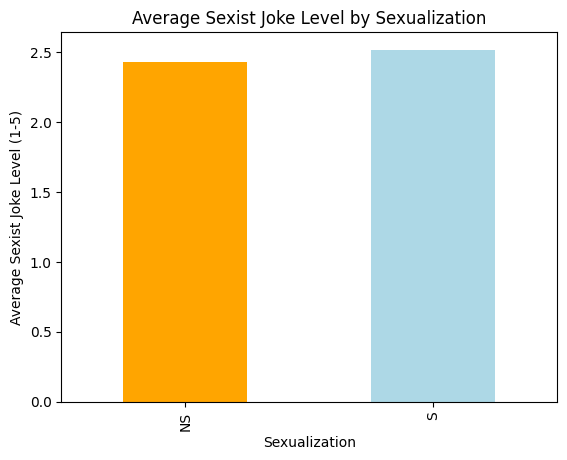

In [28]:
# barplot: comparison of sexualization and sexistjokes
# average sexist joke level by sexualization
average_sexual = filtered_df.groupby('Sexualization')['Sesistjokes'].mean()
average_sexual.plot(kind='bar', color=['orange', 'lightblue'])
plt.title("Average Sexist Joke Level by Sexualization")
plt.ylabel("Average Sexist Joke Level (1-5)")

Participants exposed to sexualized game content were, on average, slightly more likely to make a sexist joke. However, the difference between the outputs of non-sexualized and sexualized is tiny, suggesting that exposure to sexualization or not does not affect the level of sexist jokes made.

Lastly, the participant emotional state while playing the game could contribute to the results above. To look at this further, below are scatterplots displaying how participants felt while playing, such as frustrated or competitive.

Text(0, 0.5, 'Average Frustration Level')

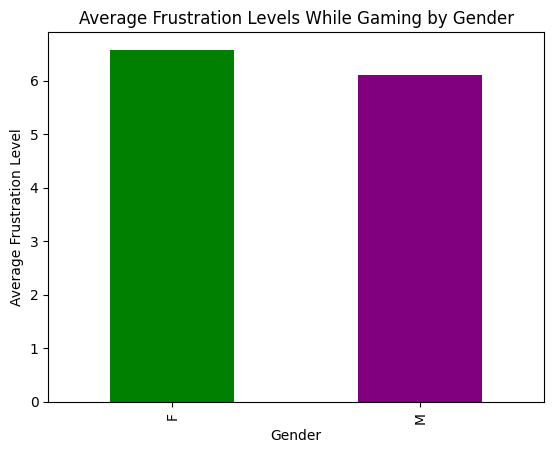

In [35]:
# groupby gender to find average of each 'emotion' variable we're testing
average_frust = filtered_df.groupby('Participantgender')['VGFrustration'].mean()
average_frust.plot(kind='bar', color=['green', 'purple'])
plt.title("Average Frustration Levels While Gaming by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Frustration Level")

Text(0, 0.5, 'Average Competitive Level')

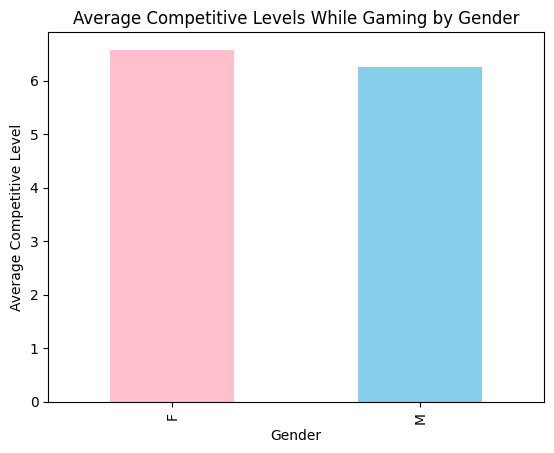

In [33]:
average_comp = filtered_df.groupby('Participantgender')['VGcompetitive'].mean()
average_comp.plot(kind='bar', color=['pink', 'skyblue'])
plt.title("Average Competitive Levels While Gaming by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Competitive Level")

Women, on average, displayed higher frustration and competitive levels during gameplay compared to men. This suggests that emotions experienced during gameplay may affect participant's behavior during and after gameplay.

###Summary Findings

#####Participants exposed to sexualized content were, on average, slightly more likely to make sexist jokes after gameplay. However, the difference between being exposed to sexualized or non-sexualized content was minimal. This suggests that sexualized content may influence sexist behavior, but it's not significant in this case.
#####When comparing genders, women had a slightly higher average of sexist jokes made than men. Although, it was a small difference, suggesting there wasn't a significant difference between male and female participants when it came to the level of sexist jokes made.  
#####As briefly mentioned in the last graphs above displaying the emotion variables, women showed higher levels of frustration and competitiveness during gameplay than men. This suggests that emotional responses may vary by gender, so it could have an influence to participant's behavior during and after gameplay.


###Conclusion
#####The goal of this analysis was to see whether gender and sexualized game content were related to a participant's behavior during and after gameplay. Although differences were found when comparing variables, they weren't significant enough to determine strong relationships. A factor that could have affected the results of this study would be that non-gamers being removed.
#####If this study was ever expanded on, I would consider including non-games, to see if the results are significantly different or not. The results weren't ground-breaking or significant, but that doesn't mean this data can't be expanded on and further researched.  
